In [41]:
import numpy as np              #Ni se si lo necesito pero porsi
from scipy import signal,misc   #Procesamiento de señales
import matplotlib.pyplot as plt #Para graficar
import pandas as pd             #Para cargar datos
import requests

Importados los modulos, luego se descarga el archivo



In [ ]:
def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)
#Descarga el archivo
wget("https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx")

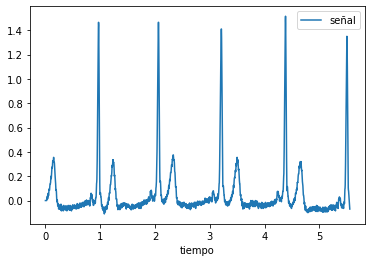

In [32]:
archivo=pd.read_excel("electrocardiograma.xlsx",index_col=0) #Cargado archivo en dataframe
archivo.plot(x="tiempo",y="señal")
sig=archivo["señal"]
t=archivo["tiempo"]
ts=t.values[-1]/t.size



In [ ]:
picos,prop=signal.find_peaks(archivo["señal"],prominence=(1,None))

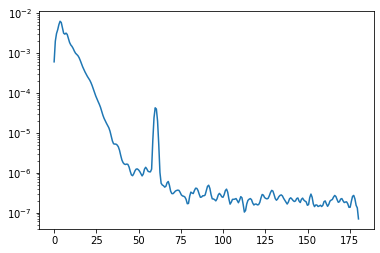

In [43]:
f,espectro=signal.welch(archivo["señal"],fs=1/ts,nfft=512)
plt.semilogy(f,espectro)
nombre_archivo=input("Ingrese un nombre de archivo para guardar el espectro del ECG: ")
plt.savefig(nombre_archivo)